In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from datetime import datetime

# =====================Dataset 1. Wines==========================

In [7]:
# Extracting the data

whiteWine = pd.read_csv('resources2/winequality-white.csv',sep=';')
redWine = pd.read_csv('resources2/winequality-red.csv',sep=';')
# 0 is for white color and 1 is for red color
whiteWine['color'] = 0
redWine['color'] = 1

bothWines = pd.concat([whiteWine, redWine], axis=0)

# Preparing the data

### Validating the data

# checking if the data contains any missing or null values
print(bothWines.isnull().sum())
bothWines.head(10)
bothWines.head(-10)

### optimising the data

# finding the correlation matrix among the variables
wine_corr = bothWines.corr()
wine_corr


qualityCorrAbsValue = wine_corr['quality'].abs()
mainFeatures = qualityCorrAbsValue[qualityCorrAbsValue > 0.05].index.values.tolist()



### Final dataset and, training and testing datasets

wx = bothWines[mainFeatures] 
wy = bothWines['quality']
wx_train,wx_test,wy_train,wy_test = train_test_split(wx,wy,random_state=0,stratify=wy)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


# ===============Dataset 2. Communities and Crimes===============

In [16]:
crimeData = pd.read_csv('resources2/communities.data', header=None, skipinitialspace=True)

crimeData.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [8]:
# extracting data
features = pd.read_csv('attributes.txt', sep=' ', header=None, skipinitialspace=True)
crimeData = pd.read_csv('communities.data',sep=',',names=features[0], header=None, skipinitialspace=True)
#replacing the invalid inputs to null
crimeData.replace(r'^\s*$', np.nan, regex=True, inplace = True)
crimeData.replace('?', np.nan, inplace = True)
print(crimeData.isnull().sum())

# we can observe that there are many features that do not have any value.
# there are some features that donot help us in findig the new perdictions,
# so we can remove them
unuseful_features = ['state','county','community','communityname','fold']
crimeData = crimeData.drop(columns=unuseful_features, axis=1)

#checking missing values
#Analysing the misssing values
clmsWithMissingVals = crimeData.columns[crimeData.isnull().any()]
print('# records:'+str(crimeData.shape[0]))
print('# cols with missing values:'+str(clmsWithMissingVals.shape[0]))

#replacing the missing values 
simpleImp = SimpleImputer(missing_values=np.nan, strategy='mean')
simpleImp.fit(crimeData[['OtherPerCap']])
crimeData[['OtherPerCap']] = simpleImp.transform(crimeData[['OtherPerCap']])
crimeData = crimeData.dropna(axis=1)

#Preparing the training and testing dataset.
crX_train, crX_test, cry_train, cry_test = train_test_split(crimeData.iloc[:, 0:100].values, crimeData.iloc[:, 100].values, test_size=0.33, random_state=0)
#Standardising the data set
scaler = StandardScaler()
scaler.fit(crX_train)
crX_train_scaled = scaler.transform(crX_train)
crX_test_scaled = scaler.transform(crX_test)

FileNotFoundError: [Errno 2] No such file or directory: 'attributes.txt'

# ======================Dataset 3. QSAR=========================

In [4]:
#Preparing data for traing
#getting the default dataset
#aquaticToxicity
#since the data does not have label, so using the data description we have to label the data 
aquaticToxicity = pd.read_csv('qsar_aquatic_toxicity.csv',sep=';',names=["TPSA(Tot)","SAacc","H-050","MLOGP","RDCHI","GATS1p","nN","C-040","LC50"])
# checking if data has any illegal values
print(aquaticToxicity.isnull().sum())


#aquaticToxicity
#
# finding the correlation matrix among the variables
aqauticToxicity_corr = aquaticToxicity.corr()
#aqauticToxicity_corr

# choosing the features whose correlation value is more 0.05
aqauticToxicity_AbsCorr = aqauticToxicity_corr['LC50'].abs()
mainFeaturs= aqauticToxicity_AbsCorr[aqauticToxicity_AbsCorr > 0.05].index.values.tolist()
#Creating the final dataset and spliting the data into training and testing datasets

qx = aquaticToxicity[mainFeaturs] 
qy = aquaticToxicity['LC50']
qx_train,qx_test,qy_train,qy_test = train_test_split(qx,qy,test_size=0.33,random_state=0)

TPSA(Tot)    0
SAacc        0
H-050        0
MLOGP        0
RDCHI        0
GATS1p       0
nN           0
C-040        0
LC50         0
dtype: int64


# ===================Dataset 4. Facebook======================

In [5]:
#importing the raw data

fbData = pd.read_csv('dataset_Facebook.csv',sep=';')

#we can see some of the rows have invalid data entries

#preprocessing the data
fbData.replace(r'^\s*$', np.nan, regex=True, inplace = True)
fbData.replace('?', np.nan, inplace = True)
print(fbData.isnull().sum())

# as we are perdicting the total Intractions so we will not consider them 
unusefullFeatures = ['comment','like','share']
fbData = fbData.drop(columns= unusefullFeatures, axis=1)
fbData["Type"].value_counts()

# since datatype of "Type" is not interger, but we can make it integer by making four cloumns for each type ; link, photo, status, video
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(fbData["Type"])
encoded_df = pd.DataFrame(lb_results, columns=lb_style.classes_)
fbData = pd.concat([fbData,encoded_df], axis=1) 
cols = list(fbData)
cols.insert(1, cols.pop(cols.index('Link')))
cols.insert(2, cols.pop(cols.index('Photo')))
cols.insert(3, cols.pop(cols.index('Status')))
cols.insert(4, cols.pop(cols.index('Video')))
fbData = fbData.loc[:, cols]
fbData = fbData.drop(columns=['Type'],axis=1)
#putting common values into the missing ones
fbData = fbData.apply(lambda x: x.fillna(x.value_counts().index[0]))
fbData.shape
(500, 19)

#Since almost every raw data has outliers so we need to remove them 
outlierThresholdValue = np.percentile(fbData['Total Interactions'],90)
fbData = fbData[fbData['Total Interactions'] < outlierThresholdValue]
fbData.shape

#Spliting the processed data into training and test datasets
fbX_train, fbX_test, fby_train, fby_test = train_test_split(fbData.iloc[:, 0:18].values, fbData.iloc[:, 18].values, test_size=0.33, random_state=0)
scaler = StandardScaler()
scaler.fit(fbX_train)
fbx_train_scaled = scaler.transform(fbX_train)
fbx_test_scaled = scaler.transform(fbX_test)

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

# =====================Dataset 5. Biking=======================

In [6]:
bikeHours = pd.read_csv('hour.csv')
bikeHours

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


As observed there is a relation between temp and count of bikes


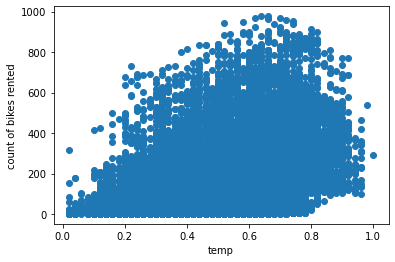

In [7]:
plt.scatter(bikeHours['temp'], bikeHours['cnt'])
plt.xlabel('temp')
plt.ylabel('count of bikes rented')
print("As observed there is a relation between temp and count of bikes")

As observed there is a relation between temp and count of bikes


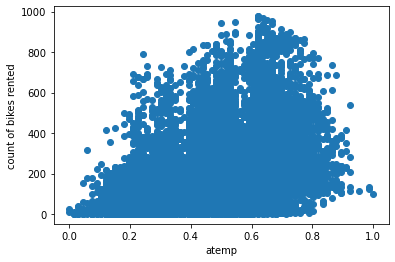

In [8]:
plt.scatter(bikeHours['atemp'], bikeHours['cnt'])
plt.xlabel('atemp')
plt.ylabel('count of bikes rented')
print("As observed there is a relation between temp and count of bikes")

In [9]:
# as we can observe that both temp and atemp have similar distribution, so we can remove one of them
bikeHours = bikeHours.drop(['atemp'], axis=1)

In [10]:
# lets copy for editing without effecting original
bikeHoursCopy = bikeHours.copy()

outcome = 'cnt'

#we can try different set of features to compare the results
feature = [f for f in list(bikeHoursCopy) if f not in [outcome, 'instant', 'dteday']]

#spliting data into train and test portion
X_trian, X_test, y_train, y_test = train_test_split(bikeHoursCopy[feature],
                                                   bikeHoursCopy[outcome],
                                                   test_size=0.3, random_state=0)

# ====================Dataset 6. Students=====================

In [11]:
studentPortMarks = pd.read_csv('student-por.csv',sep=';',  skipinitialspace=True)


In [12]:
# checking if the dataset has invalid entries
print(studentPortMarks.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [13]:
### optimising the data

labels = studentPortMarks['G3']

#since we are perdicting G3, so school G1, and G2 are not useful
studentPortMarks = studentPortMarks.drop(['school', 'G1', 'G2'], axis='columns')

studentPortMarks = pd.get_dummies(studentPortMarks)
#finding the correlation among the features and selecting only top 8 features
corr_studentPortMarks = studentPortMarks.corr().abs()['G3'].sort_values(ascending=False)
corr_studentPortMarks = corr_studentPortMarks[:9]
studentPortMarks = studentPortMarks.loc[:, corr_studentPortMarks.index]
studentPortMarks = studentPortMarks.drop('higher_no', axis='columns')
#Splitting the data into 75% into training set and 25% into testing set
X_train, X_test, y_train, y_test = train_test_split(studentPortMarks, labels, test_size = 0.25, random_state=0)

# ===========Dateset 7. Concrete Compressive Strength===========

In [14]:
concreteData = pd.read_excel('Concrete_Data.xls')
cX_train,cX_test,cy_train,cy_test = train_test_split(
    concreteData[concreteData.columns[:-1]],
    concreteData[concreteData.columns[-1]],
    random_state=0)
scaler = StandardScaler()
scaler.fit(cX_train)
cX_train_scaled = scaler.transform(cX_train)
cX_test_scaled = scaler.transform(cX_test)

# ===================Dateset 8. GPU =================== 

In [15]:
#extracting data
gpuData = pd.read_csv("sgemm_product.csv")

#checking null values
print(gpuData.isnull().sum())
#Preparing the the dataset
X = gpuData[gpuData.columns[:-5]] 
y = (gpuData['Run1 (ms)']+gpuData['Run2 (ms)']+gpuData['Run3 (ms)']+gpuData['Run4 (ms)'])/4
#Analysing Correlation between various features of the wine dataset
gpu_corr = gpuData.corr()

#splitting the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
